In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

xls = pd.ExcelFile("../Data/Data_Tables_LGA_Recorded_Offences_Year_Ending_September_2021.xlsx")
df = pd.read_excel (xls,'Table 04')

In [3]:
df.head(40)

,Year,Year ending,Local Government Area,Location Division,Location Subdivision,Location Group,Offence Count
0,2021,September,Alpine,1 Residential,11 Dwelling - private,111 Flat/Unit/Apartment,6
1,2021,September,Alpine,1 Residential,11 Dwelling - private,112 House,173
2,2021,September,Alpine,1 Residential,11 Dwelling - private,114 Caravan/Mobile Home,8
3,2021,September,Alpine,1 Residential,11 Dwelling - private,116 Ministry Of Housing,1
4,2021,September,Alpine,1 Residential,11 Dwelling - private,117 Farm House,8
5,2021,September,Alpine,1 Residential,12 Dwelling - non-private,122 Holiday Home,7
6,2021,September,Alpine,1 Residential,12 Dwelling - non-private,125 Hotel/Motel,7
7,2021,September,Alpine,1 Residential,12 Dwelling - non-private,126 Other Dwelling,2
8,2021,September,Alpine,1 Residential,13 Grounds/surrounding land,1310 Farm Building,2
9,2021,September,Alpine,1 Residential,13 Grounds/surrounding land,132 Backyard,6


## ANALYSIS OF "OFFENCE  COUNTS" PREMISES WHERE INCIDENT OCCURED

In [4]:
cdf = df.groupby(['Year','Location Division'])['Offence Count'].agg(['sum'])
cdf.head()

sum
Year Location Division        
2012 1 Residential      144249
     2 Community        123343
     3 Other             97859
2013 1 Residential      151342
     2 Community        126490

In [5]:
Total = df.groupby(['Year'])['Offence Count'].agg(['sum'])
Total

,sum
Year,
2012,365451
2013,383250
2014,396151
2015,420110
2016,493606
2017,488398
2018,481912
2019,502674
2020,523642


In [31]:
Residential = df[df['Location Division']=='1 Residential']
Residential = Residential.groupby(['Year'])['Offence Count'].sum()
Residential

Year
2012    144249
2013    151342
2014    160841
2015    175747
2016    210252
2017    214696
2018    212536
2019    227413
2020    241063
2021    238162
Name: Offence Count, dtype: int64

In [28]:
Community = df[df['Location Division']=='2 Community']
Community = Community.groupby(['Year'])['Offence Count'].sum()
Community

Year
2012    123343
2013    126490
2014    132779
2015    136354
2016    161744
2017    156204
2018    154793
2019    152484
2020    171325
2021    135048
Name: Offence Count, dtype: int64

In [29]:
Other = df[df['Location Division']=='3 Other']
Other = Other.groupby(['Year'])['Offence Count'].sum()
Other

Year
2012     97859
2013    105418
2014    102531
2015    108009
2016    121610
2017    117498
2018    114583
2019    122777
2020    111254
2021     97809
Name: Offence Count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

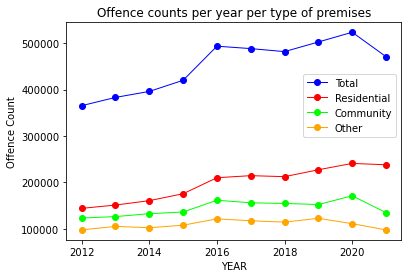

In [104]:
x = np.arange(2012,2022,1)
plt.plot(x,Total, marker="o", color="blue", linewidth=1, label="Total")
plt.plot(x,Residential, marker="o", color="red", linewidth=1, label="Residential")
plt.plot(x,Community, marker="o", color="lime", linewidth=1, label="Community")
plt.plot(x,Other, marker="o", color="orange", linewidth=1, label="Other")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.45))
plt.title("Offence counts per year per type of premises")
plt.xlabel("YEAR")
plt.ylabel("Offence Count")
plt.show

In [44]:
Residentialwhere = df[df['Location Division']=='1 Residential']
Residentialwhere = Residentialwhere.groupby(['Location Group'])['Offence Count'].sum()
Residentialwhere.sort_values()

Location Group
115 Houseboat                          432
131 Clothesline/Laundry                575
123 Guest House                       1235
1310 Farm Building                    2718
117 Farm House                        4804
113 Bungalow                          5159
124 Nursing Home                      5209
122 Holiday Home                      6081
121 Boarding House                    8764
126 Other Dwelling                    8834
114 Caravan/Mobile Home               8881
116 Ministry Of Housing              17670
137 Other Residential (nec)          20256
136 Premises Under Construction      21682
135 Shed                             22685
139 Carpark Multi Dwelling           25603
125 Hotel/Motel                      25981
132 Backyard                         33576
134 Garage                           47136
138 Driveway/Carport                109389
133 Frontyard                       162457
111 Flat/Unit/Apartment             221338
112 House                          1215

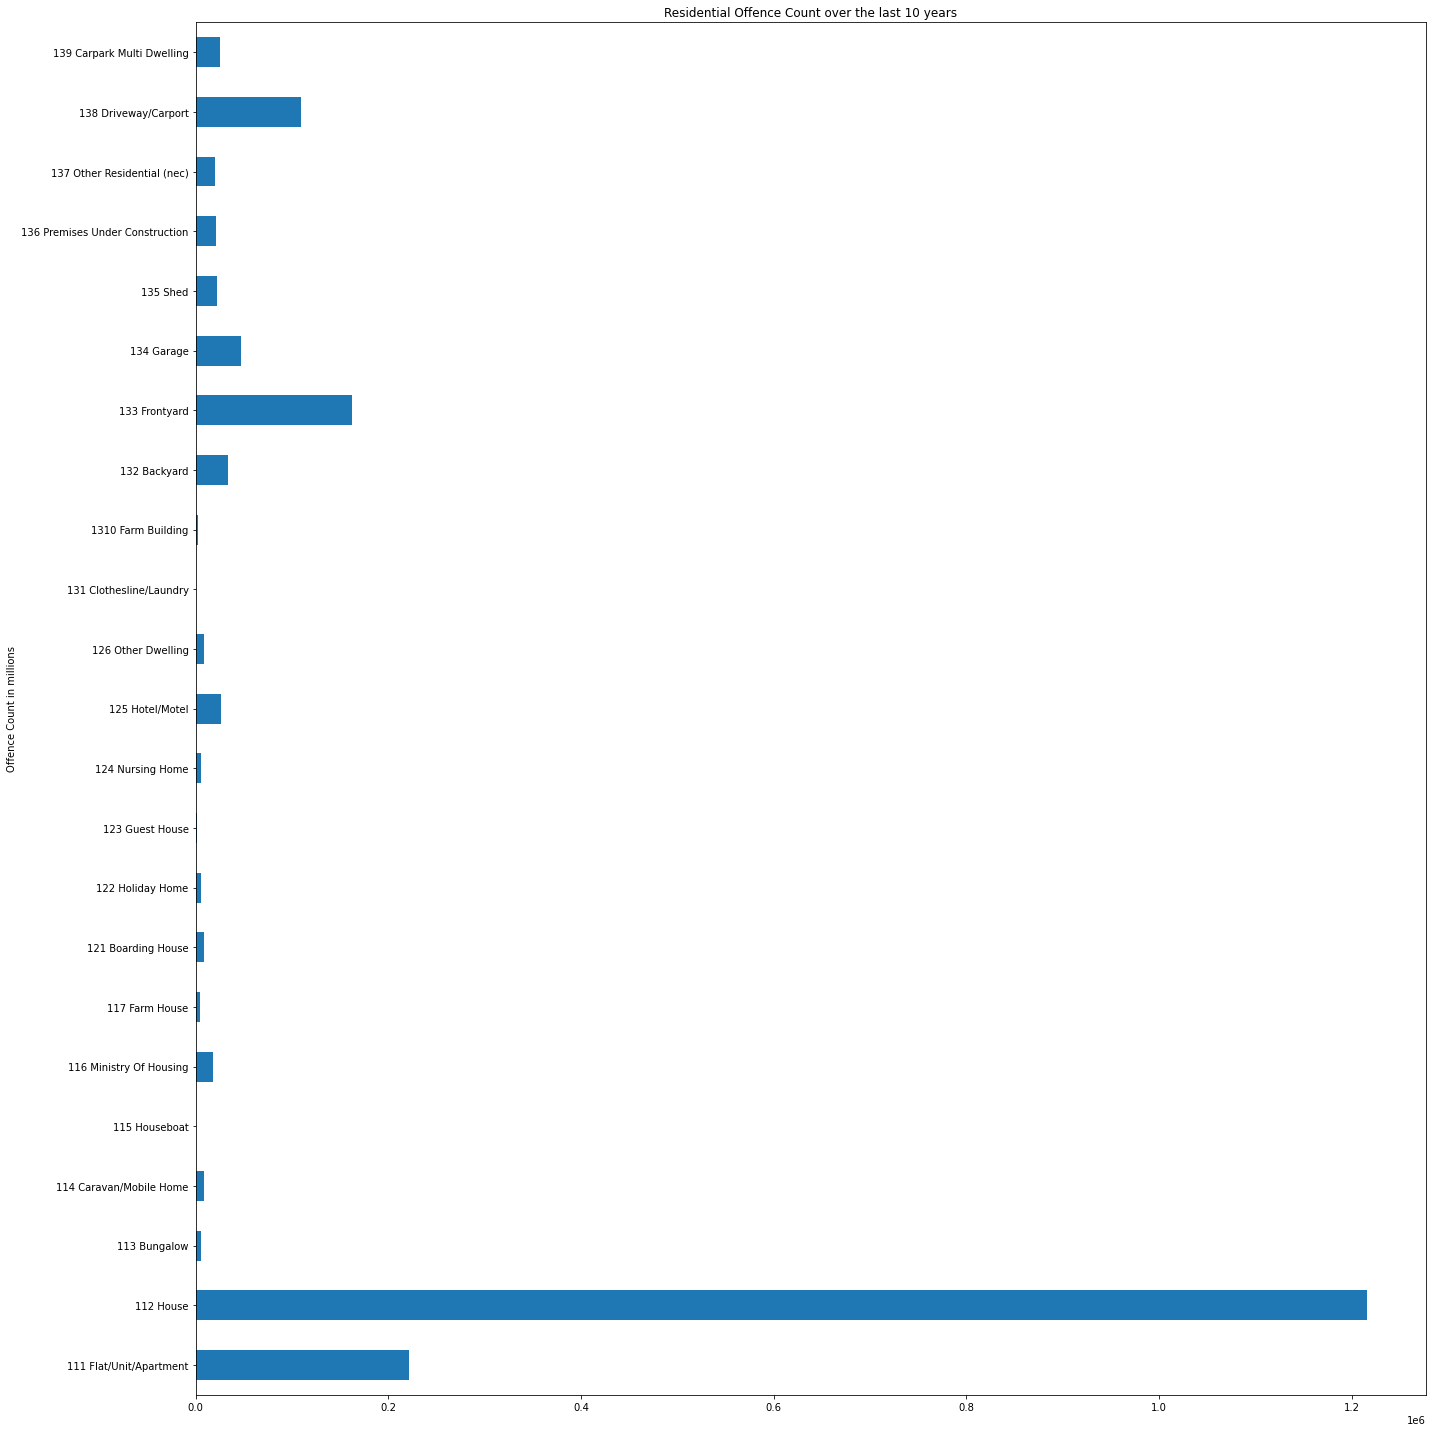

In [67]:
Residentialwhere.plot(kind = 'barh', figsize = (20,20))
plt.title('Residential Offence Count over the last 10 years')
plt.ylabel('Offence Count in millions')
#plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

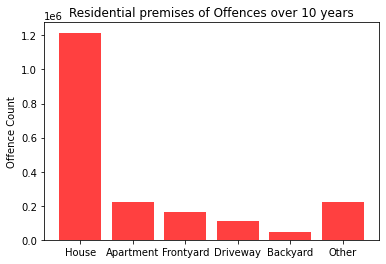

In [99]:
## Residential Summary
x = ['House','Apartment','Frontyard','Driveway','Backyard','Other']
y = [1215836,221338,162457,109389,47136,220145]
plt.title("Residential premises of Offences over 10 years")
#plt.xlabel("Residential Location")
plt.ylabel("Offence Count")
plt.bar(x,y, facecolor="red", alpha=0.75, align="center")
plt.show()

In [46]:
Communitywhere = df[df['Location Division']=='2 Community']
Communitywhere = Communitywhere.groupby(['Location Group'])['Offence Count'].sum()
Communitywhere.sort_values()

Location Group
247 Freight Yard                                230
248 Office (Public transport office Only)       258
264 Youth Training Centre                       268
293 Gallery                                     507
253 Boat                                        671
232 Other religious                            1115
254 Dock/Wharf                                 1130
291 Cemetery                                   1518
276 Beach Car Park                             1865
265 Other Justice Facility                     2063
246 Depot/Terminal                             2104
252 Airfield                                   2136
294 Car Wash                                   2304
273 Vacant Block                               2557
269 Other Justice (nec)                        2673
223 Dental                                     3536
249 Taxi                                       3793
272 Rural                                      5139
292 Civic Centre                               51

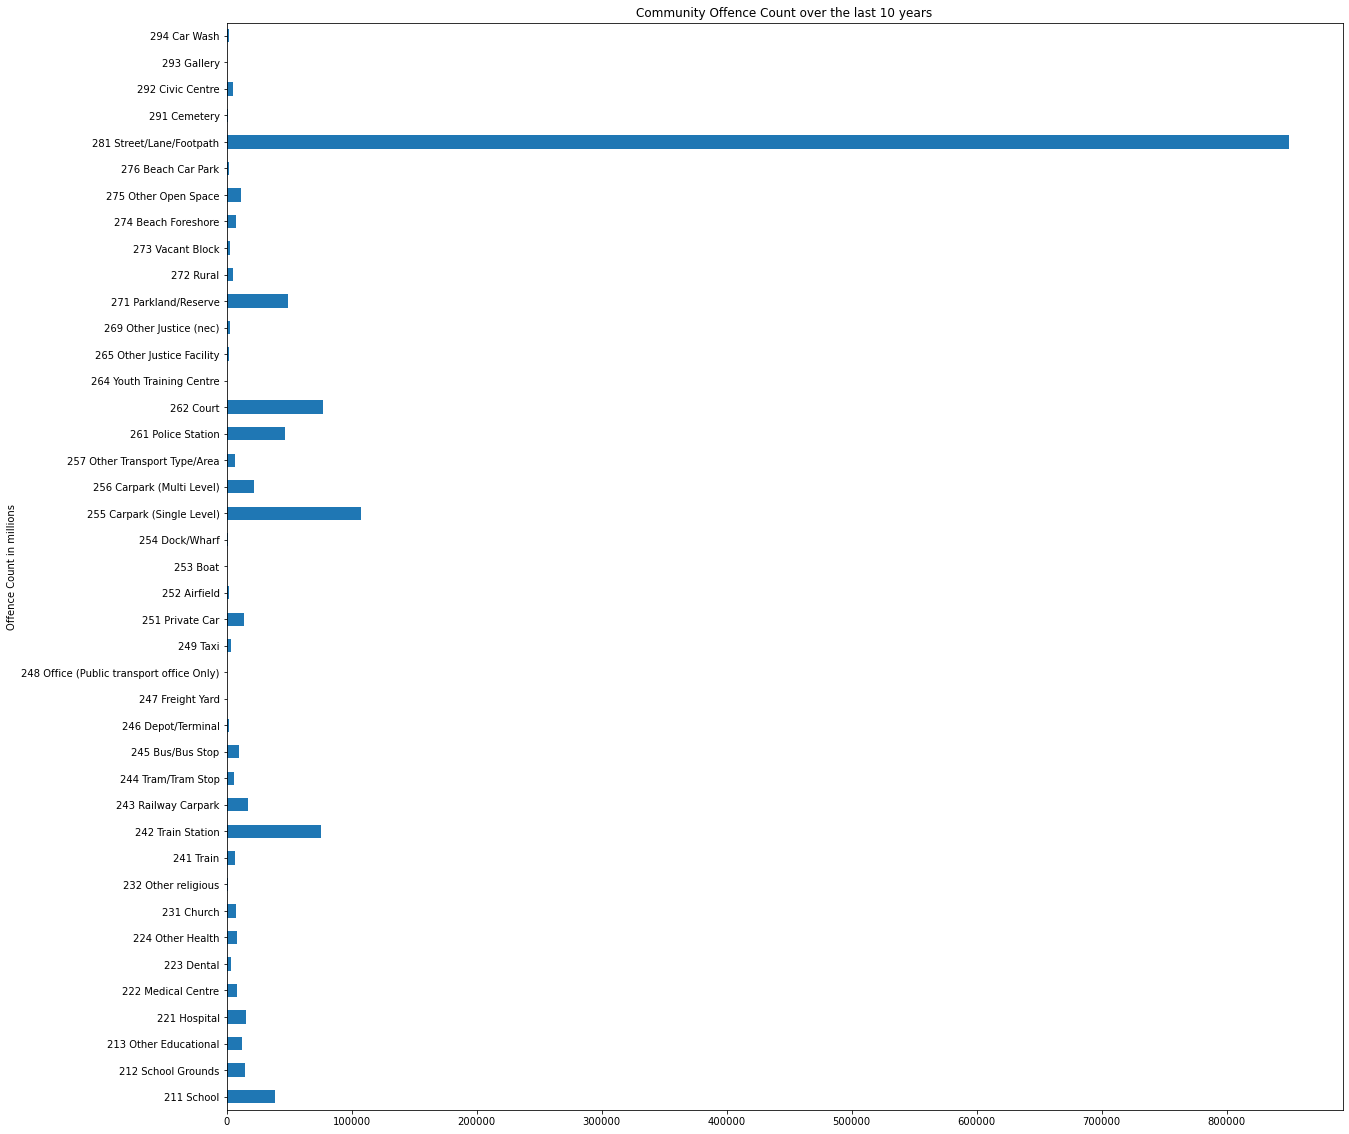

In [68]:
Communitywhere.plot(kind = 'barh', figsize = (20,20))
plt.title('Community Offence Count over the last 10 years')
plt.ylabel('Offence Count in millions')
#plt.tight_layout()
plt.show()

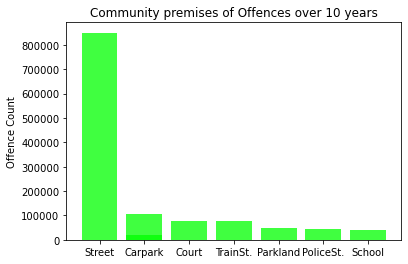

In [100]:
## Community Summary
x = ['Street','Carpark','Court','TrainSt.','Parkland','PoliceSt.','School','Carpark',]
y = [850111,107146,77326,75246,49386,46362,38419,21715]
plt.title("Community premises of Offences over 10 years")
#plt.xlabel("Community Location")
plt.ylabel("Offence Count")
plt.bar(x,y, facecolor="lime", alpha=0.75, align="center")
plt.show()

In [47]:
Otherwhere = df[df['Location Division']=='3 Other']
Otherwhere = Otherwhere.groupby(['Location Group'])['Offence Count'].sum()
Otherwhere.sort_values()

Location Group
322 Credit Society                       169
372 Orchard                              289
394 Veterinary Clinic                    640
382 Tab                                  913
383 Cinema                               981
324 Other Financial                     1276
391 Massage Parlour/Brothel             1298
333 Jeweller                            1667
341 Any Wholesale                       3074
373 Other Agricultural                  4083
323 ATM/Eftpos                          4818
362 Any Manufacturing                   6041
334 2nd Hand Dealer                     6518
339 Milkbar                             6683
338 Car Sales Yard                     10828
385 Gaming Venue                       11804
312 Other Admin/Professional           12240
371 Farmland/Agricultural              12967
331 Chemist/Pharmacy                   17280
393 Construction Site                  18286
321 Bank                               19488
386 Other Rec./Sports                  1

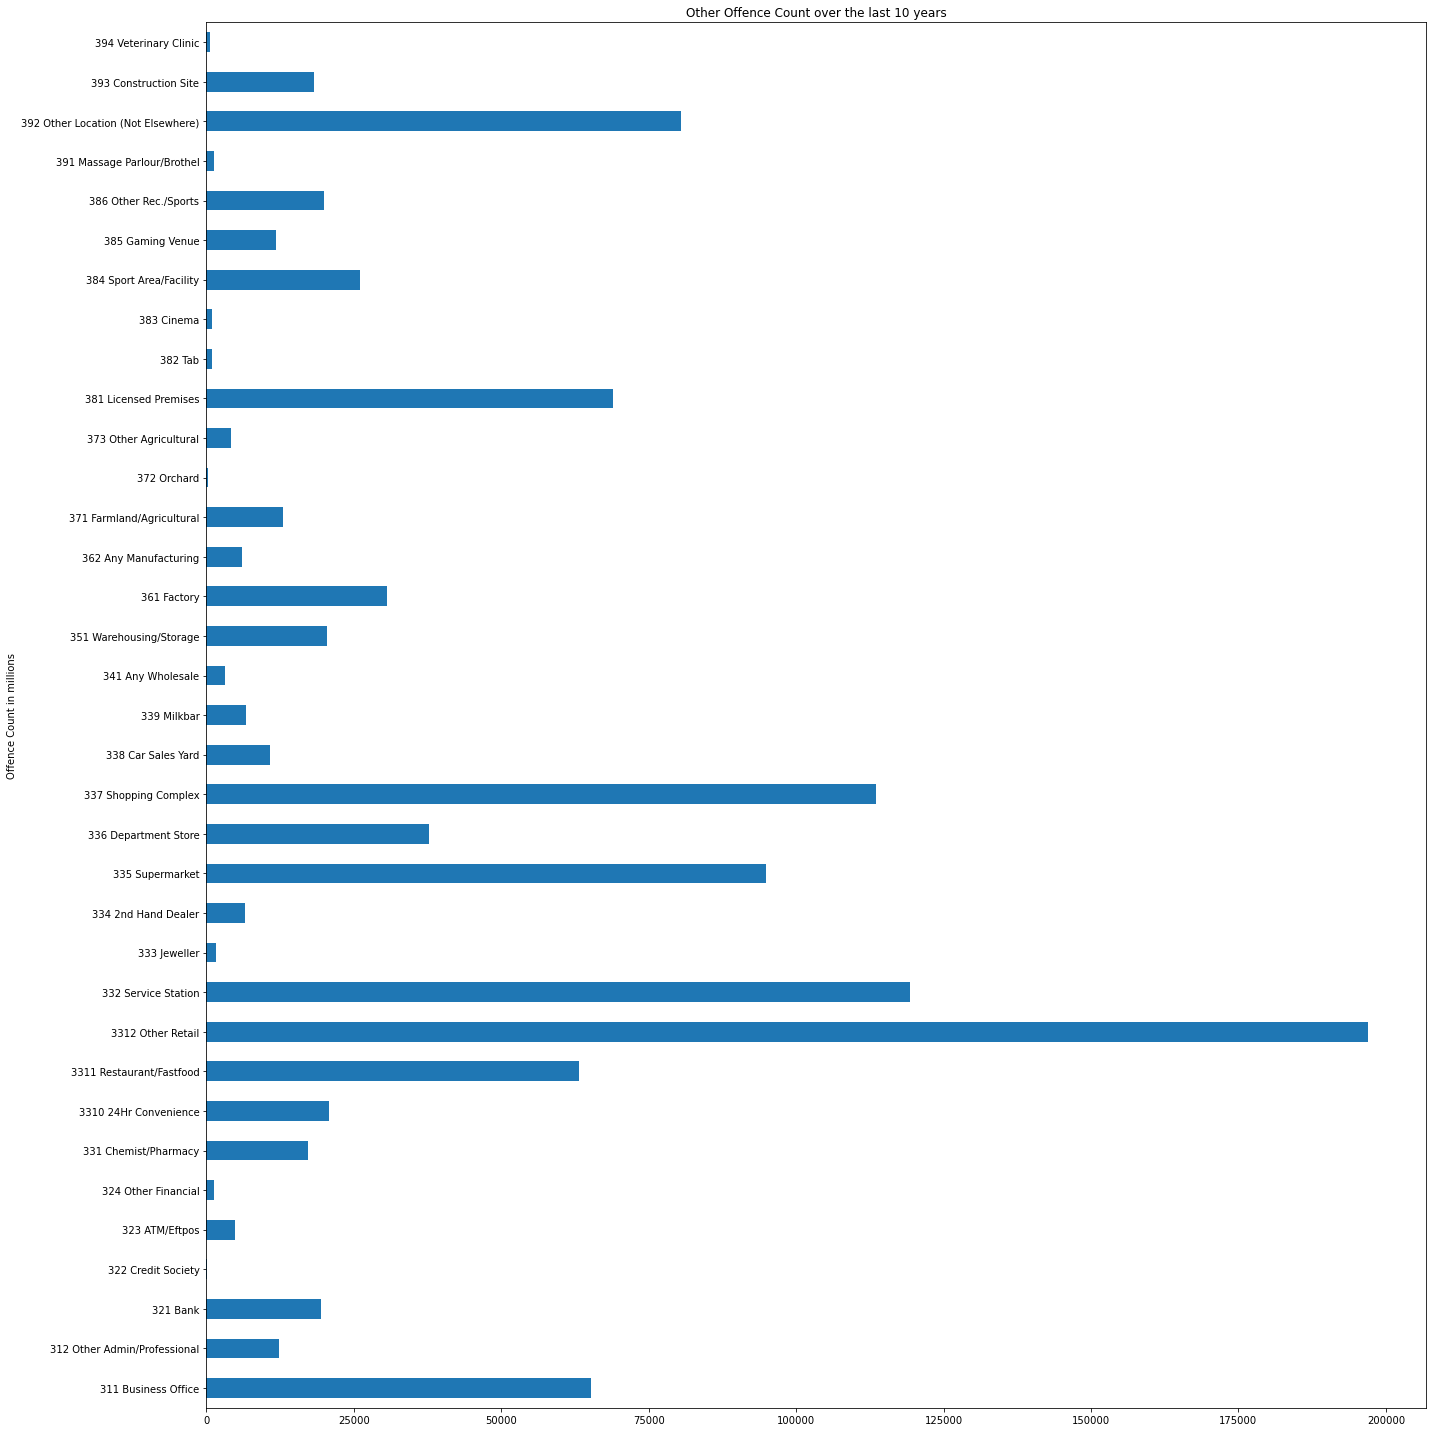

In [69]:
Otherwhere.plot(kind = 'barh', figsize = (20,20))
plt.title('Other Offence Count over the last 10 years')
plt.ylabel('Offence Count in millions')
plt.tight_layout()
plt.show()

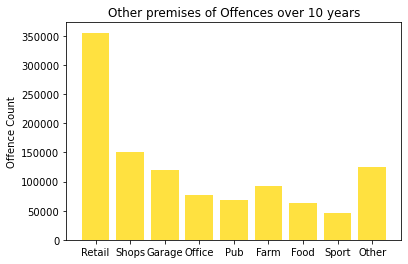

In [101]:
## Other Summary
x = ['Retail','Shops','Garage','Office','Pub','Farm','Food','Sport','Other']
y = [355583,151262,119321,77515,68875,92666,63249,45996,124881]
plt.title("Other premises of Offences over 10 years")
#plt.xlabel("Community Location")
plt.ylabel("Offence Count")
plt.bar(x,y, facecolor="gold", alpha=0.75, align="center")
plt.show()